In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Load all data

In [78]:
df=pd.read_csv("C:/Users/student/Documents/Home Credit/All files/data-agg.csv")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356250 entries, 0 to 356249
Columns: 622 entries, AMT_ANNUITY to INS_60M_DPD_15_MEAN
dtypes: float64(596), int64(26)
memory usage: 1.7 GB


# Filter missing values train

In [80]:
test=df[df.TARGET.isnull()]
train=df[df.TARGET.notnull()]

In [81]:
missing_values = train.isnull().sum()/len(train)*100
missing_values[missing_values>0].sort_values(ascending = True)

AMT_ANNUITY                                      0.003902
ANNUITY_TO_INCOME_RATIO                          0.003902
CREDIT_TO_ANNUITY_RATIO                          0.003902
EXT_SOURCES_MIN                                  0.055934
EXT_SOURCES_MEAN                                 0.055934
EXT_SOURCES_NANMEDIAN                            0.055934
EXT_SOURCES_MAX                                  0.055934
EXT_SOURCES_VAR                                  0.055934
CREDIT_TO_GOODS_RATIO                            0.090405
AMT_GOODS_PRICE                                  0.090405
EXT_SOURCE_2                                     0.214630
DEF_30_CNT_SOCIAL_CIRCLE                         0.332026
DEF_60_CNT_SOCIAL_CIRCLE                         0.332026
INS_AMT_PAYMENT_SUM                              5.160225
INS_SIGNIFICANT_LATE_PAYMENT_MEAN                5.160225
INS_PAYMENT_DIFFERENCE_MEAN                      5.160225
INS_PAYMENT_RATIO_MEAN                           5.160225
INS_LATE_PAYME

In [84]:
# Saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,587):
    if a[i]<=30:   #setting the threshold as 30%
        variable.append(variables[i])

In [85]:
train_30=train[variable]
missing_values_30 = train_30.isnull().sum()/len(train_30)*100
missing_values_30.sort_values(ascending = False)

BUREAU_ACTIVE_AMT_CREDIT_SUM_MAX                       29.385443
BUREAU_ACTIVE_DAYS_CREDIT_MAX                          29.385118
BUREAU_ACTIVE_DAYS_CREDIT_MEAN                         29.385118
BUREAU_ACTIVE_MONTHS_BALANCE_SIZE_SUM                  29.385118
BUREAU_ACTIVE_DAYS_CREDIT_UPDATE_MEAN                  29.385118
BUREAU_ACTIVE_DAYS_CREDIT_UPDATE_MIN                   29.385118
BUREAU_ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN              29.385118
BUREAU_ACTIVE_AMT_CREDIT_SUM_OVERDUE_MAX               29.385118
BUREAU_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM                  29.385118
BUREAU_ACTIVE_AMT_CREDIT_SUM_SUM                       29.385118
BUREAU_CLOSED_AMT_CREDIT_SUM_DEBT_MAX                  29.000410
PREV_LAST24M_SIMPLE_INTERESTS_MAX                      26.991018
PREV_LAST24M_SIMPLE_INTERESTS_MEAN                     26.991018
PREV_LAST24M_AMT_ANNUITY_MEAN                          26.989392
PREV_LAST24M_AMT_ANNUITY_MAX                           26.989392
PREV_LAST24M_APPLICATION_

# Impute train

In [87]:

columns = train_30.columns
for col in columns:
    train_30[col].fillna(train_30[col].median(),inplace = True)

In [116]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [99]:
clean_dataset(train_30)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,...,INS_36M_AMT_INSTALMENT_MAX,INS_36M_AMT_INSTALMENT_MEAN,INS_36M_AMT_INSTALMENT_SUM,INS_36M_AMT_PAYMENT_MIN,INS_36M_AMT_PAYMENT_MAX,INS_36M_AMT_PAYMENT_MEAN,INS_36M_AMT_PAYMENT_SUM,INS_36M_DPD_MAX,INS_36M_DPD_MEAN,INS_36M_DPD_VAR
535,13653.0,364896.0,315000.0,99000.0,0.0,0.0,0.0,1.0,-11156.0,-890.0,...,1.938825e+04,6368.100098,3.820860e+04,3764.070068,1.938825e+04,6368.100098,3.820860e+04,0.0,0.000000,0.000000
558,13045.5,119925.0,112500.0,76500.0,0.0,1.0,0.0,1.0,-12463.0,-1631.0,...,9.760905e+03,9760.589844,5.856354e+04,9759.014648,9.760905e+03,9760.589844,5.856354e+04,0.0,0.000000,0.000000
864,25348.5,862560.0,720000.0,157500.0,0.0,0.0,0.0,0.0,-14391.0,-3952.0,...,4.295160e+03,4295.024902,5.583532e+04,419.040009,4.295160e+03,3964.628174,5.154016e+04,2.0,0.153846,0.307692
1124,28341.0,268659.0,243000.0,112500.0,0.0,1.0,0.0,1.0,-10333.0,-1855.0,...,7.980588e+05,64282.082031,1.735616e+06,1.485000,7.980588e+05,62853.140625,1.697035e+06,5.0,0.259259,0.968661
1229,26775.0,253737.0,229500.0,180000.0,0.0,0.0,0.0,1.0,-10373.0,-463.0,...,4.342140e+04,21898.380859,2.189838e+05,5902.154785,4.342140e+04,21898.380859,2.189838e+05,0.0,0.000000,0.000000
1523,17779.5,495000.0,495000.0,112500.0,0.0,1.0,0.0,1.0,-19458.0,-8300.0,...,4.550958e+04,45509.578125,7.736629e+05,45509.578125,4.550958e+04,45509.578125,7.736629e+05,1.0,0.058824,0.058824
2288,19926.0,364896.0,315000.0,180000.0,0.0,0.0,0.0,0.0,-10039.0,-822.0,...,2.698213e+04,9865.783203,2.071814e+05,3.420000,2.698213e+04,9581.416992,2.012098e+05,4.0,0.190476,0.761905
2342,10125.0,202500.0,202500.0,202500.0,0.0,0.0,0.0,1.0,-9022.0,-863.0,...,5.704875e+03,4872.354004,1.266812e+05,279.315002,5.704875e+03,4497.059570,1.169235e+05,2.0,0.269231,0.364615
2542,15336.0,229500.0,229500.0,202500.0,0.0,0.0,0.0,0.0,-10573.0,-3092.0,...,1.457397e+04,10679.688477,1.067969e+05,4942.665039,1.457397e+04,10679.688477,1.067969e+05,0.0,0.000000,0.000000
3085,9000.0,180000.0,180000.0,67500.0,0.0,0.0,0.0,1.0,-10076.0,-2194.0,...,1.644503e+04,16441.738281,2.959513e+05,16385.849609,1.644503e+04,16441.738281,2.959513e+05,0.0,0.000000,0.000000


In [100]:
train_30.isnull().sum()/len(train_30)*100

AMT_ANNUITY                          0.0
AMT_CREDIT                           0.0
AMT_GOODS_PRICE                      0.0
AMT_INCOME_TOTAL                     0.0
AMT_REQ_CREDIT_BUREAU_HOUR           0.0
AMT_REQ_CREDIT_BUREAU_QRT            0.0
AMT_REQ_CREDIT_BUREAU_WEEK           0.0
CODE_GENDER                          0.0
DAYS_BIRTH                           0.0
DAYS_EMPLOYED                        0.0
DAYS_ID_PUBLISH                      0.0
DAYS_LAST_PHONE_CHANGE               0.0
DAYS_REGISTRATION                    0.0
DEF_30_CNT_SOCIAL_CIRCLE             0.0
DEF_60_CNT_SOCIAL_CIRCLE             0.0
EXT_SOURCE_2                         0.0
EXT_SOURCE_3                         0.0
FLAG_DOCUMENT_18                     0.0
FLAG_DOCUMENT_3                      0.0
FLAG_DOCUMENT_8                      0.0
FLAG_OWN_CAR                         0.0
FLAG_WORK_PHONE                      0.0
LIVE_CITY_NOT_WORK_CITY              0.0
LIVE_REGION_NOT_WORK_REGION          0.0
NAME_CONTRACT_TY

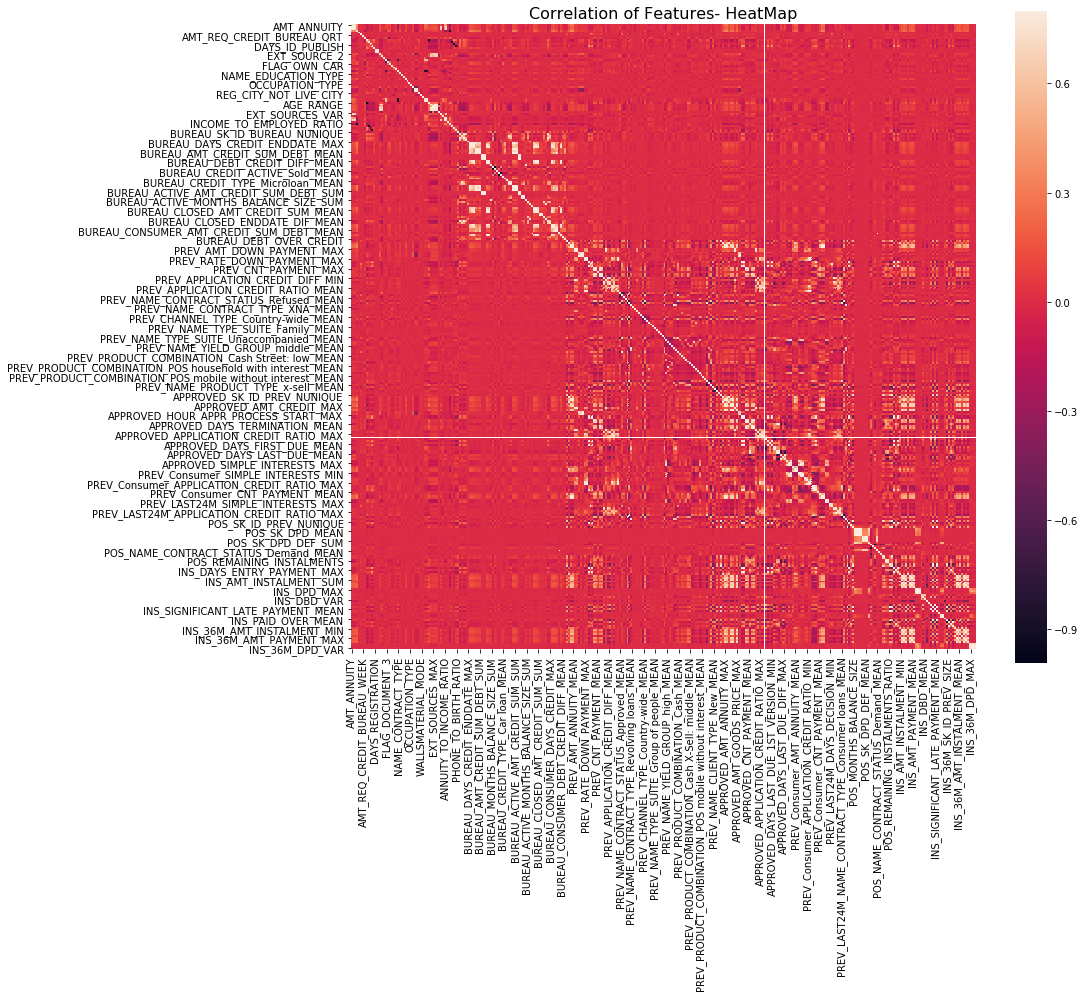

In [101]:
df=train_30.drop(['TARGET','SK_ID_CURR'] ,1)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features- HeatMap',y=1,size=16)
sns.heatmap(df.corr(),square = True,  vmax=0.8)

In [102]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
to_drop
# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 290 columns


In [123]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
reduced_df=pd.get_dummies(reduced_df)
model.fit(reduced_df,train.TARGET)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

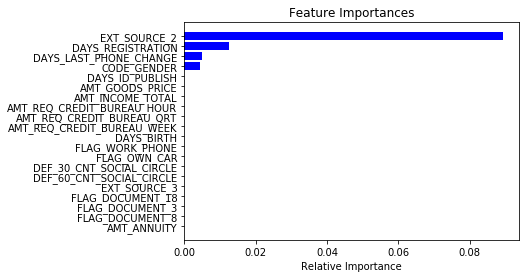

In [125]:
features = reduced_df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:20])  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [126]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(reduced_df, train.TARGET)

Fit.shape


(631, 80)

In [132]:
feature_idx = feature.get_support()
feature_name = reduced_df.columns[feature_idx]
feature_name

Index(['CODE_GENDER', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'EXT_SOURCE_2', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_HOUSING_TYPE',
       'EXT_SOURCES_MIN', 'EXT_SOURCES_MAX', 'EXT_SOURCES_NANMEDIAN',
       'CREDIT_TO_GOODS_RATIO', 'CREDIT_TO_INCOME_RATIO',
       'INCOME_TO_BIRTH_RATIO', 'EMPLOYED_TO_BIRTH_RATIO',
       'PHONE_TO_BIRTH_RATIO', 'BUREAU_DAYS_CREDIT_MAX',
       'BUREAU_DAYS_CREDIT_ENDDATE_MIN', 'BUREAU_AMT_CREDIT_SUM_MAX',
       'BUREAU_DEBT_CREDIT_DIFF_MEAN', 'BUREAU_CREDIT_ACTIVE_Sold_MEAN',
       'BUREAU_CREDIT_TYPE_Credit card_MEAN', 'BUREAU_CLOSED_DAYS_CREDIT_MAX',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_SUM', 'BUREAU_CONSUMER_DAYS_CREDIT_MAX',
       'BUREAU_CONSUMER_AMT_CREDIT_SUM_MAX',
       'BUREAU_CONSUMER_AMT_CREDIT_SUM_DEBT_MEAN',
       'BUREAU_CONSUMER_AMT_CREDIT_SUM_DEBT_MAX',
       'BUREAU_CONSUMER_DEBT_PERCENTAGE_MEAN',
       'BUREAU_CONSUMER_DEBT_CREDIT_DIFF_MEAN', 'BUREAU_DEBT_OVER_CREDIT',
       'PREV_SK_ID_PREV_NUNIQUE', 'PREV_AMT_DOWN

In [133]:
reduced_df=reduced_df[feature_name]

In [134]:
train=pd.concat([reduced_df,train_30.TARGET],axis=1)

In [137]:
reduced_df=clean_dataset(reduced_df)
train=clean_dataset(train)

In [138]:
X = train.drop(columns=['TARGET']).values  # features matrix 
Y = train.TARGET.values        # target variable

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LR: 0.912872 (0.030193)
LDA: 0.876414 (0.030648)


C:\Users\student\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.914484 (0.025478)
CART: 0.844742 (0.046225)
NB: 0.505605 (0.084124)


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

SVM: 0.916071 (0.027235)


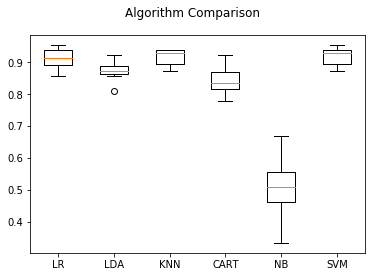

In [152]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [148]:
nullacc=1-train.TARGET.sum()/len(train)
(0.916071-nullacc)*100/nullacc

0.007058996539794997

In [ ]:
train.columns

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, Y)
clf.predict